## 1. Download data and make json to DataFrame

In [1]:
import pandas as pd

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# checking time

"""
data loading

start
"""

'\ndata loading\n\nstart\n'

In [ ]:
import json

start = datetime.now()

path = "./dblp_v14.json"

with open(path, "r") as json_file:
    json_data = json.load(json_file)
    
end = datetime.now()

print(f"elapsed time is {end - start}")

In [ ]:
json_data

In [ ]:
import pandas as pd

start = datetime.now()

raw = pd.DataFrame(json_data)

end = datetime.now()

print(f"elapsed time is {end - start}")

## 2. Data Preprocessing

In [ ]:
raw

In [ ]:
# for i in range(100):
#     print(raw['authors'][i][0]['name'])

In [ ]:
raw.columns

In [ ]:
main_features = ['id','title', 'venue','year',
                 'keywords','fos','references', 'n_citation',
                 'doc_type','abstract']

df = raw[main_features]
df

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
len(df[df['abstract'] == ''].index)

In [14]:
# fos, references 결측치제거
df.dropna(subset = ['fos','references'], inplace = True)
df.reset_index(inplace = True, drop = True)

# abstract 결측치 제거
empty_idx = df[df['abstract'] == ''].index
df.drop(index=empty_idx, inplace = True)
df.reset_index(inplace = True, drop = True)
df[df['abstract'] == ''].index

/tmp/ipykernel_2531455/4024845515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=empty_idx, inplace = True)


Index([], dtype='int64')

In [16]:

df

/tmp/ipykernel_2531455/450886473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['fos','references'], inplace = True)
/tmp/ipykernel_2531455/450886473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['level_0','index'], axis = 1, inplace = True)


,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e997d7b7602d9701fcb029,Country-specific characteristics of patent app...,{'raw': 'TECHNOLOGY ANALYSIS & STRATEGIC MANAG...,2002,[genetic engineering],"[{'name': 'Economics', 'w': 0.43914}, {'name':...",[53e9bb8db7602d97047d767d],10,Journal,Given that institutions are highly country-spe...
1,53e997ddb7602d9701fd1f73,A multiple controller structure and design str...,{'raw': 'Automatica (Journal of IFAC)'},1992,"[design strategy, multiple controller structur...","[{'name': 'Control theory', 'w': 0.56092}, {'n...",[],6,Journal,This paper proposes a multi-controller structu...
2,53e997ddb7602d9701fd3ad7,Rewrite-Based Satisfiability Procedures for Re...,{'raw': 'Electronic Notes in Theoretical Compu...,2007,"[theorem-proving strategy, rewrite-based appro...","[{'name': 'Data structure', 'w': 0.48341}, {'n...","[53e9a31fb7602d9702c2c61e, 53e997f1b7602d9701f...",19,Journal,If a rewrite-based inference system is guarant...
3,53e997e3b7602d9701fd8f32,A Philosophical at Knowledge Management.,{'raw': 'Wissensmanagement'},2003,[knowledge management],"[{'name': 'Descriptive knowledge', 'w': 0.7005...","[53e99976b7602d97021b6b8a, 53e9acd3b7602d97036...",0,Conference,Knowledge management claims to be the successo...
4,53e997e4b7602d9701fdcb6f,Boolean Judgment Logic,{'raw': 'International Conference on Conceptua...,2001,"[power context family, information system, bas...","[{'name': 'Boolean function', 'w': 0.61635}, {...","[53e997e8b7602d9701fdff8b, 53e99867b7602d97020...",25,Conference,How to introduce negations for formal (semi-)c...
...,...,...,...,...,...,...,...,...,...,...
2719995,5ea833369fced0a24b74c95f,Passivity-Based Decentralized Control of Multi...,{'raw': '2019 International Symposium on Multi...,2019,"[control framework, minimally invasive fashion...","[{'name': 'Passivity', 'w': 0.45713}, {'name':...","[53e9a0cab7602d97029b65a2, 558abe8384ae84d265b...",0,Conference,"In this paper, we present a solution to the pr..."
2719996,5ce6e0b43a55acfbc368ae6d,Can a Humanoid Robot be part of the Organizati...,{'raw': '2019 28th IEEE International Conferen...,2019,"[humanoid robot, organizational workforce, sen...","[{'name': 'Social work', 'w': 0.48298}, {'name...","[58437718ac44360f1082de53, 573698826e3b12023e7...",12,Conference,Hiring robots for the workplaces is a challeng...
2719997,5da6ed2c3a55ac45df741f02,Natural Language Guided Visual Relationship De...,{'raw': '2019 IEEE/CVF Conference on Computer ...,2019,"[Visual Genome datasets, Visual Relationship D...","[{'name': 'Computer vision', 'w': 0.42417}, {'...","[558a6aa684ae84d265bd7b55, 53e9b338b7602d9703e...",50,Conference,Reasoning about the relationships between obje...
2719998,5f35115491e011e2b713e0bb,Universal Unconditional Verifiability in E-Vot...,{'raw': '2020 IEEE 33rd Computer Security Foun...,2020,"[universal unconditional verifiability, truste...","[{'name': 'Voting', 'w': 0.65043}, {'name': 'C...","[53e9afdab7602d9703a2aacc, 53e9a562b7602d9702e...",3,Conference,"In e-voting protocols, cryptographers must bal..."


In [17]:
idx = 0
idx_list = []

for r in df['references']:
    if len(r) == 0:
        idx_list.append(idx)
    idx += 1

df.drop(index=idx_list, inplace = True)
df

/tmp/ipykernel_2531455/3189016820.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=idx_list, inplace = True)


,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e997d7b7602d9701fcb029,Country-specific characteristics of patent app...,{'raw': 'TECHNOLOGY ANALYSIS & STRATEGIC MANAG...,2002,[genetic engineering],"[{'name': 'Economics', 'w': 0.43914}, {'name':...",[53e9bb8db7602d97047d767d],10,Journal,Given that institutions are highly country-spe...
2,53e997ddb7602d9701fd3ad7,Rewrite-Based Satisfiability Procedures for Re...,{'raw': 'Electronic Notes in Theoretical Compu...,2007,"[theorem-proving strategy, rewrite-based appro...","[{'name': 'Data structure', 'w': 0.48341}, {'n...","[53e9a31fb7602d9702c2c61e, 53e997f1b7602d9701f...",19,Journal,If a rewrite-based inference system is guarant...
3,53e997e3b7602d9701fd8f32,A Philosophical at Knowledge Management.,{'raw': 'Wissensmanagement'},2003,[knowledge management],"[{'name': 'Descriptive knowledge', 'w': 0.7005...","[53e99976b7602d97021b6b8a, 53e9acd3b7602d97036...",0,Conference,Knowledge management claims to be the successo...
4,53e997e4b7602d9701fdcb6f,Boolean Judgment Logic,{'raw': 'International Conference on Conceptua...,2001,"[power context family, information system, bas...","[{'name': 'Boolean function', 'w': 0.61635}, {...","[53e997e8b7602d9701fdff8b, 53e99867b7602d97020...",25,Conference,How to introduce negations for formal (semi-)c...
5,53e997e4b7602d9701fdcd0e,Beyond induction variables,{'raw': 'Special Interest Group on Programming...,1992,"[pattern recognition, static single assignment...","[{'name': 'Integer', 'w': 0.45652}, {'name': '...","[53e9ac5bb7602d970362911b, 53e9b716b7602d97042...",180,Conference,Induction variable detection is usually closel...
...,...,...,...,...,...,...,...,...,...,...
2719995,5ea833369fced0a24b74c95f,Passivity-Based Decentralized Control of Multi...,{'raw': '2019 International Symposium on Multi...,2019,"[control framework, minimally invasive fashion...","[{'name': 'Passivity', 'w': 0.45713}, {'name':...","[53e9a0cab7602d97029b65a2, 558abe8384ae84d265b...",0,Conference,"In this paper, we present a solution to the pr..."
2719996,5ce6e0b43a55acfbc368ae6d,Can a Humanoid Robot be part of the Organizati...,{'raw': '2019 28th IEEE International Conferen...,2019,"[humanoid robot, organizational workforce, sen...","[{'name': 'Social work', 'w': 0.48298}, {'name...","[58437718ac44360f1082de53, 573698826e3b12023e7...",12,Conference,Hiring robots for the workplaces is a challeng...
2719997,5da6ed2c3a55ac45df741f02,Natural Language Guided Visual Relationship De...,{'raw': '2019 IEEE/CVF Conference on Computer ...,2019,"[Visual Genome datasets, Visual Relationship D...","[{'name': 'Computer vision', 'w': 0.42417}, {'...","[558a6aa684ae84d265bd7b55, 53e9b338b7602d9703e...",50,Conference,Reasoning about the relationships between obje...
2719998,5f35115491e011e2b713e0bb,Universal Unconditional Verifiability in E-Vot...,{'raw': '2020 IEEE 33rd Computer Security Foun...,2020,"[universal unconditional verifiability, truste...","[{'name': 'Voting', 'w': 0.65043}, {'name': 'C...","[53e9afdab7602d9703a2aacc, 53e9a562b7602d9702e...",3,Conference,"In e-voting protocols, cryptographers must bal..."


In [18]:
# dict로 된 fos 분리

fos =''
fos_list = []

for f in df['fos']:
    if len(f) > 0:
        for i in range(len(f)):
            fos = f[i]['name']
    fos_list.append(fos)

df['fos'] = fos_list
df          

/tmp/ipykernel_2531455/4274153314.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fos'] = fos_list


,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e997d7b7602d9701fcb029,Country-specific characteristics of patent app...,{'raw': 'TECHNOLOGY ANALYSIS & STRATEGIC MANAG...,2002,[genetic engineering],Biotechnology,[53e9bb8db7602d97047d767d],10,Journal,Given that institutions are highly country-spe...
2,53e997ddb7602d9701fd3ad7,Rewrite-Based Satisfiability Procedures for Re...,{'raw': 'Electronic Notes in Theoretical Compu...,2007,"[theorem-proving strategy, rewrite-based appro...",Satisfiability modulo theories,"[53e9a31fb7602d9702c2c61e, 53e997f1b7602d9701f...",19,Journal,If a rewrite-based inference system is guarant...
3,53e997e3b7602d9701fd8f32,A Philosophical at Knowledge Management.,{'raw': 'Wissensmanagement'},2003,[knowledge management],Knowledge engineering,"[53e99976b7602d97021b6b8a, 53e9acd3b7602d97036...",0,Conference,Knowledge management claims to be the successo...
4,53e997e4b7602d9701fdcb6f,Boolean Judgment Logic,{'raw': 'International Conference on Conceptua...,2001,"[power context family, information system, bas...",And-inverter graph,"[53e997e8b7602d9701fdff8b, 53e99867b7602d97020...",25,Conference,How to introduce negations for formal (semi-)c...
5,53e997e4b7602d9701fdcd0e,Beyond induction variables,{'raw': 'Special Interest Group on Programming...,1992,"[pattern recognition, static single assignment...",Nested loop join,"[53e9ac5bb7602d970362911b, 53e9b716b7602d97042...",180,Conference,Induction variable detection is usually closel...
...,...,...,...,...,...,...,...,...,...,...
2719995,5ea833369fced0a24b74c95f,Passivity-Based Decentralized Control of Multi...,{'raw': '2019 International Symposium on Multi...,2019,"[control framework, minimally invasive fashion...",Encoding (memory),"[53e9a0cab7602d97029b65a2, 558abe8384ae84d265b...",0,Conference,"In this paper, we present a solution to the pr..."
2719996,5ce6e0b43a55acfbc368ae6d,Can a Humanoid Robot be part of the Organizati...,{'raw': '2019 28th IEEE International Conferen...,2019,"[humanoid robot, organizational workforce, sen...",Humanoid robot,"[58437718ac44360f1082de53, 573698826e3b12023e7...",12,Conference,Hiring robots for the workplaces is a challeng...
2719997,5da6ed2c3a55ac45df741f02,Natural Language Guided Visual Relationship De...,{'raw': '2019 IEEE/CVF Conference on Computer ...,2019,"[Visual Genome datasets, Visual Relationship D...",Artificial intelligence,"[558a6aa684ae84d265bd7b55, 53e9b338b7602d9703e...",50,Conference,Reasoning about the relationships between obje...
2719998,5f35115491e011e2b713e0bb,Universal Unconditional Verifiability in E-Vot...,{'raw': '2020 IEEE 33rd Computer Security Foun...,2020,"[universal unconditional verifiability, truste...",Computer science,"[53e9afdab7602d9703a2aacc, 53e9a562b7602d9702e...",3,Conference,"In e-voting protocols, cryptographers must bal..."


In [19]:
# dict 로 된 venue 분리
start = datetime.now()

v_list = []
v = ''
for v in df['venue']:
    if(type(v) == str):
        v_list.append(v)
    else:
        v_list.append(v['raw'])
    
df['venue'] = v_list
end = datetime.now()

print(f"elapsed time is {end - start}")

df

elapsed time is 0:00:04.330928


/tmp/ipykernel_2531455/1531487931.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['venue'] = v_list


,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e997d7b7602d9701fcb029,Country-specific characteristics of patent app...,TECHNOLOGY ANALYSIS & STRATEGIC MANAGEMENT,2002,[genetic engineering],Biotechnology,[53e9bb8db7602d97047d767d],10,Journal,Given that institutions are highly country-spe...
2,53e997ddb7602d9701fd3ad7,Rewrite-Based Satisfiability Procedures for Re...,Electronic Notes in Theoretical Computer Scien...,2007,"[theorem-proving strategy, rewrite-based appro...",Satisfiability modulo theories,"[53e9a31fb7602d9702c2c61e, 53e997f1b7602d9701f...",19,Journal,If a rewrite-based inference system is guarant...
3,53e997e3b7602d9701fd8f32,A Philosophical at Knowledge Management.,Wissensmanagement,2003,[knowledge management],Knowledge engineering,"[53e99976b7602d97021b6b8a, 53e9acd3b7602d97036...",0,Conference,Knowledge management claims to be the successo...
4,53e997e4b7602d9701fdcb6f,Boolean Judgment Logic,International Conference on Conceptual Structures,2001,"[power context family, information system, bas...",And-inverter graph,"[53e997e8b7602d9701fdff8b, 53e99867b7602d97020...",25,Conference,How to introduce negations for formal (semi-)c...
5,53e997e4b7602d9701fdcd0e,Beyond induction variables,Special Interest Group on Programming Languages,1992,"[pattern recognition, static single assignment...",Nested loop join,"[53e9ac5bb7602d970362911b, 53e9b716b7602d97042...",180,Conference,Induction variable detection is usually closel...
...,...,...,...,...,...,...,...,...,...,...
2719995,5ea833369fced0a24b74c95f,Passivity-Based Decentralized Control of Multi...,2019 International Symposium on Multi-Robot an...,2019,"[control framework, minimally invasive fashion...",Encoding (memory),"[53e9a0cab7602d97029b65a2, 558abe8384ae84d265b...",0,Conference,"In this paper, we present a solution to the pr..."
2719996,5ce6e0b43a55acfbc368ae6d,Can a Humanoid Robot be part of the Organizati...,2019 28th IEEE International Conference on Rob...,2019,"[humanoid robot, organizational workforce, sen...",Humanoid robot,"[58437718ac44360f1082de53, 573698826e3b12023e7...",12,Conference,Hiring robots for the workplaces is a challeng...
2719997,5da6ed2c3a55ac45df741f02,Natural Language Guided Visual Relationship De...,2019 IEEE/CVF Conference on Computer Vision an...,2019,"[Visual Genome datasets, Visual Relationship D...",Artificial intelligence,"[558a6aa684ae84d265bd7b55, 53e9b338b7602d9703e...",50,Conference,Reasoning about the relationships between obje...
2719998,5f35115491e011e2b713e0bb,Universal Unconditional Verifiability in E-Vot...,2020 IEEE 33rd Computer Security Foundations S...,2020,"[universal unconditional verifiability, truste...",Computer science,"[53e9afdab7602d9703a2aacc, 53e9a562b7602d9702e...",3,Conference,"In e-voting protocols, cryptographers must bal..."


In [20]:
# dict 남아있나 체크

for v in df['venue']:
    if (type(v) == dict ):
        print(v)

In [21]:
# df.drop('authors',axis=1, inplace = True)

# df.reset_index(inplace = True, drop = True)

In [22]:
# # author dict split to each column

# start = datetime.now()

# id = []
# name = []
# org = []

# id_list = []
# name_list = []
# org_list = []

# for a in df['authors']:
#     if (len(a) > 0):
#         for i in range(len(a)):
#             id.append(a[i]['id'])
#             name.append(a[i]['name'])
#             org.append(a[i]['org'])
            
# #     id_list.append(id)
#     name_list.append(name)
# #     org_list.append(org)

# # df['author_id'] = id_list
# df['author_name'] = name_list
# # df['author_org'] = org_list

# df.drop('authors',axis=1, inplace = True)

# df.reset_index(inplace = True, drop = True)

# end = datetime.now()

# print(f"elapsed time is {end - start}")

# df

In [23]:
# df.drop(['author_id','author_name','author_org'],axis=1, inplace = True)
# df

In [24]:
df.reset_index(inplace = True, drop = True)
df

,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e997d7b7602d9701fcb029,Country-specific characteristics of patent app...,TECHNOLOGY ANALYSIS & STRATEGIC MANAGEMENT,2002,[genetic engineering],Biotechnology,[53e9bb8db7602d97047d767d],10,Journal,Given that institutions are highly country-spe...
1,53e997ddb7602d9701fd3ad7,Rewrite-Based Satisfiability Procedures for Re...,Electronic Notes in Theoretical Computer Scien...,2007,"[theorem-proving strategy, rewrite-based appro...",Satisfiability modulo theories,"[53e9a31fb7602d9702c2c61e, 53e997f1b7602d9701f...",19,Journal,If a rewrite-based inference system is guarant...
2,53e997e3b7602d9701fd8f32,A Philosophical at Knowledge Management.,Wissensmanagement,2003,[knowledge management],Knowledge engineering,"[53e99976b7602d97021b6b8a, 53e9acd3b7602d97036...",0,Conference,Knowledge management claims to be the successo...
3,53e997e4b7602d9701fdcb6f,Boolean Judgment Logic,International Conference on Conceptual Structures,2001,"[power context family, information system, bas...",And-inverter graph,"[53e997e8b7602d9701fdff8b, 53e99867b7602d97020...",25,Conference,How to introduce negations for formal (semi-)c...
4,53e997e4b7602d9701fdcd0e,Beyond induction variables,Special Interest Group on Programming Languages,1992,"[pattern recognition, static single assignment...",Nested loop join,"[53e9ac5bb7602d970362911b, 53e9b716b7602d97042...",180,Conference,Induction variable detection is usually closel...
...,...,...,...,...,...,...,...,...,...,...
2501348,5ea833369fced0a24b74c95f,Passivity-Based Decentralized Control of Multi...,2019 International Symposium on Multi-Robot an...,2019,"[control framework, minimally invasive fashion...",Encoding (memory),"[53e9a0cab7602d97029b65a2, 558abe8384ae84d265b...",0,Conference,"In this paper, we present a solution to the pr..."
2501349,5ce6e0b43a55acfbc368ae6d,Can a Humanoid Robot be part of the Organizati...,2019 28th IEEE International Conference on Rob...,2019,"[humanoid robot, organizational workforce, sen...",Humanoid robot,"[58437718ac44360f1082de53, 573698826e3b12023e7...",12,Conference,Hiring robots for the workplaces is a challeng...
2501350,5da6ed2c3a55ac45df741f02,Natural Language Guided Visual Relationship De...,2019 IEEE/CVF Conference on Computer Vision an...,2019,"[Visual Genome datasets, Visual Relationship D...",Artificial intelligence,"[558a6aa684ae84d265bd7b55, 53e9b338b7602d9703e...",50,Conference,Reasoning about the relationships between obje...
2501351,5f35115491e011e2b713e0bb,Universal Unconditional Verifiability in E-Vot...,2020 IEEE 33rd Computer Security Foundations S...,2020,"[universal unconditional verifiability, truste...",Computer science,"[53e9afdab7602d9703a2aacc, 53e9a562b7602d9702e...",3,Conference,"In e-voting protocols, cryptographers must bal..."


In [25]:
year_series = df['year'].value_counts()
year_series.sort_index(ascending=True, inplace = True)
year_series

year
1949         4
1954         3
1955         7
1956        10
1957        22
         ...  
2018    130707
2019     61048
2020      3652
2021         4
2022         4
Name: count, Length: 70, dtype: int64

<Axes: xlabel='year'>

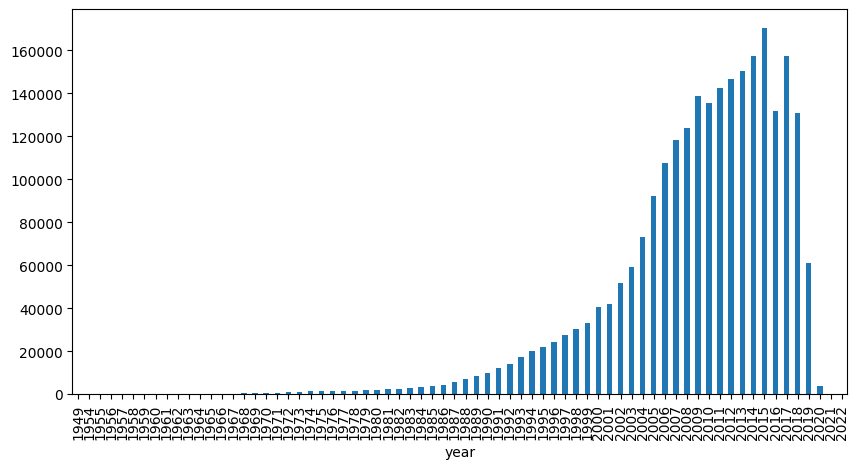

In [26]:
year_series.plot.bar(x='year',y='paper_count', figsize=(10,5))

In [27]:
year_avg = year_series.mean(axis = 0)
year_avg

35733.614285714284

In [28]:
# temp_list = []
# for y in year_series.index:
#     if (year_series[y] < year_avg):
#         temp_list.append(y)
    
# print(temp_list)

In [29]:
import copy

df2 = df.copy()

In [73]:
temp_list = []
for y in year_series.index:
    if (year_series[y] < year_avg):
        temp_list.append(y)
    
print(temp_list)

[1949, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2020, 2021, 2022]


In [74]:
# 논문 갯수가 평균갯수 이하인 year 삭제.

start = datetime.now()

for y in temp_list:
    idx = df2[df2['year'] == y].index
    df2.drop(idx, inplace = True)
        
df2.reset_index(inplace = True, drop = True)
end = datetime.now()
print(f"elapsed time is {end - start}")
df2

,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e997d7b7602d9701fcb029,Country-specific characteristics of patent app...,TECHNOLOGY ANALYSIS & STRATEGIC MANAGEMENT,2002,[genetic engineering],Biotechnology,[53e9bb8db7602d97047d767d],10,Journal,Given that institutions are highly country-spe...
1,53e997ddb7602d9701fd3ad7,Rewrite-Based Satisfiability Procedures for Re...,Electronic Notes in Theoretical Computer Scien...,2007,"[theorem-proving strategy, rewrite-based appro...",Satisfiability modulo theories,"[53e9a31fb7602d9702c2c61e, 53e997f1b7602d9701f...",19,Journal,If a rewrite-based inference system is guarant...
2,53e997e3b7602d9701fd8f32,A Philosophical at Knowledge Management.,Wissensmanagement,2003,[knowledge management],Knowledge engineering,"[53e99976b7602d97021b6b8a, 53e9acd3b7602d97036...",0,Conference,Knowledge management claims to be the successo...
3,53e997e4b7602d9701fdcb6f,Boolean Judgment Logic,International Conference on Conceptual Structures,2001,"[power context family, information system, bas...",And-inverter graph,"[53e997e8b7602d9701fdff8b, 53e99867b7602d97020...",25,Conference,How to introduce negations for formal (semi-)c...
4,53e997e4b7602d9701fdd6dd,Biometrics or ... biohazards?,Workshop on New Security Paradigms,2002,"[old paradigm, new paradigm, deployable techno...",Government,"[558293410cf2b2c1f110e86f, 53e99ab8b7602d97023...",22,Conference,IPSE DIXIT Biometrics as an array of deployabl...
...,...,...,...,...,...,...,...,...,...,...
2230358,5ea833109fced0a24b74b497,Exploitation Techniques and Defenses for Data-...,2019 IEEE Cybersecurity Development (SecDev),2019,"[Data-oriented attacks, Exploitation technique...",Multiple time dimensions,"[573698826e3b12023e741df7, 53e9bd18b7602d97049...",0,Conference,Data-oriented attacks manipulate non-control d...
2230359,5ea833369fced0a24b74c95f,Passivity-Based Decentralized Control of Multi...,2019 International Symposium on Multi-Robot an...,2019,"[control framework, minimally invasive fashion...",Encoding (memory),"[53e9a0cab7602d97029b65a2, 558abe8384ae84d265b...",0,Conference,"In this paper, we present a solution to the pr..."
2230360,5ce6e0b43a55acfbc368ae6d,Can a Humanoid Robot be part of the Organizati...,2019 28th IEEE International Conference on Rob...,2019,"[humanoid robot, organizational workforce, sen...",Humanoid robot,"[58437718ac44360f1082de53, 573698826e3b12023e7...",12,Conference,Hiring robots for the workplaces is a challeng...
2230361,5da6ed2c3a55ac45df741f02,Natural Language Guided Visual Relationship De...,2019 IEEE/CVF Conference on Computer Vision an...,2019,"[Visual Genome datasets, Visual Relationship D...",Artificial intelligence,"[558a6aa684ae84d265bd7b55, 53e9b338b7602d9703e...",50,Conference,Reasoning about the relationships between obje...


<Axes: xlabel='year'>

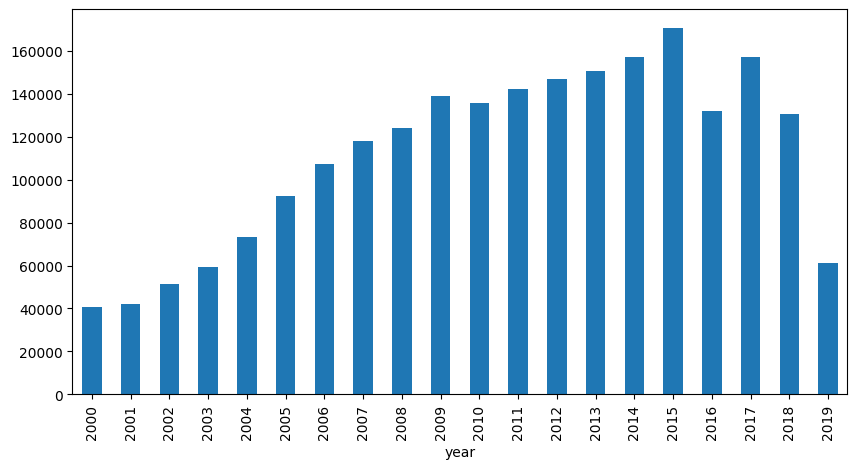

In [75]:
year_series2 = df2['year'].value_counts()
year_series2.sort_index(ascending=True, inplace = True)
year_series2.plot.bar(x='year',y='paper_count', figsize=(10,5))

In [76]:
fos_series = df2['fos'].value_counts()
fos_series.sort_values(ascending=True, inplace = True)
fos_series

fos
Hybrid energy                    1
Visual assessment                1
Sensorimotor integration         1
Pain tolerance                   1
Koniocellular cell               1
                             ...  
Embedded system              33484
The Internet                 40778
Machine learning            110524
Distributed computing       141508
Mathematics                 187528
Name: count, Length: 29341, dtype: int64

In [82]:
fos_avg = fos_series.mean()
fos_avg

76.01523465457892

In [83]:
# top 10
fos_series[29331]

19791

In [84]:
# 논문 갯수 top 10 fos만 남기기

idx_list = []

start = datetime.now()

min_threshold = 19791

for y in fos_series.index:
    
    if (fos_series[y] >= min_threshold):
        idx = df2[df2['fos'] == y].index.tolist()
        idx_list.extend(idx)
        

df3 = df2.iloc[idx_list,:]
        
df3.reset_index(inplace = True, drop = True)

end = datetime.now()

print(f"elapsed time is {end - start}")

elapsed time is 0:00:07.376467


In [105]:
df3

,id,title,venue,year,keywords,fos,references,n_citation,doc_type,abstract
0,53e99bc0b7602d970246566f,Prominence prediction for supersentential pros...,SSW,2004,"[hidden variables, database design]",Database,"[5c78fed34895d9cbc60cbb62, 53e997e3b7602d9701f...",16,Conference,Most current prosodic modeling techniques are ...
1,53e9a0aeb7602d9702998956,Content-Based Browsing In Large News Video Dat...,PROCEEDINGS OF THE FIFTH IASTED INTERNATIONAL ...,2004,"[content-based retrieval, browsing, indexing...",Database,"[558a910384ae84d265be5b08, 53e99b3cb7602d97023...",43,Conference,"In this paper, we have evaluated the effective..."
2,53e9a32eb7602d9702c3b5f2,Modeling and Executing Semantic B2B Integration,RIDE '02 Proceedings of the 12th International...,2002,"[business proc-esses, high number, trading par...",Database,"[53e9a500b7602d9702e20189, 53e9b0abb7602d9703b...",27,Conference,Trying to achieve B2B integration by programmi...
3,53e9a5e2b7602d9702f0f666,Folksonomies and science communication: A mash...,Information Services and Use,2007,"[scientific document, specific tag distributio...",Database,"[53e999e7b7602d970222e1fc, 53e99af2b7602d97023...",67,Journal,Folksonomies complete the methods of indexing ...
4,53e9a64ab7602d9702f773e2,Mining Purity Dependencies in Databases.,EGC,2002,[relational database],Database,[53e99e45b7602d9702707376],6,Conference,. We introduce purity dependencies as general...
...,...,...,...,...,...,...,...,...,...,...
644847,5e3fd9863a55ac85116f5a28,Estimating Correlation Coefficients for Quantu...,2019 IEEE Global Conference on Signal and Info...,2019,"[Quantum radar, noise radar, covariance matrix...",Mathematics,"[53e9a3e0b7602d9702cf2caf, 5c3f21d73a55acc9f73...",0,Conference,"For target detection, quantum two-mode squeezi..."
644848,5e58e62a91e0118a06a5359c,A Method for SSVEP Recognition Based on Weight...,2019 IEEE Symposium Series on Computational In...,2019,"[brain-computer interface (BCI), steady-state ...",Mathematics,"[53e9a5beb7602d9702eea2ce, 59d98de80cf2415686e...",4,Conference,"As a multivariate statistical method, canonica..."
644849,5e58e62a91e0118a06a53614,Time-Varying Complex Zhang Matrix (ZM) with It...,2019 IEEE Symposium Series on Computational In...,2019,"[zhang neural network, complex time-varying ma...",Mathematics,"[53e9a914b7602d97032657f1, 53e9a81fb7602d97031...",2,Conference,The concepts of Getz-Masden matrix (GMM) and Z...
644850,5e5e192693d709897ce55944,Effect of Colored Content on Depth Perception ...,2019 IEEE/ACIS 18th International Conference o...,2019,"[color, subjective evaluation, depth perceptio...",Mathematics,[58d8303fd649053542fe8001],0,Conference,This paper has mainly focused on the depth per...


In [106]:
len(df3['fos'].unique())

10

In [107]:
fos_series2 = df3['fos'].value_counts()
fos_series2.sort_values(ascending=True, inplace = True)
fos_series2

fos
Database                  19791
Cloud computing           21278
Computation               29394
Scalability               30016
Multimedia                30551
Embedded system           33484
The Internet              40778
Machine learning         110524
Distributed computing    141508
Mathematics              187528
Name: count, dtype: int64

In [108]:
len(df3['keywords'])

644852

In [109]:
len(df3)

644852

In [110]:
df3.rename(columns = {'references' : 'refer_doc'}, inplace = True)
df3.head()

/tmp/ipykernel_2531455/3482508406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns = {'references' : 'refer_doc'}, inplace = True)


,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e99bc0b7602d970246566f,Prominence prediction for supersentential pros...,SSW,2004,"[hidden variables, database design]",Database,"[5c78fed34895d9cbc60cbb62, 53e997e3b7602d9701f...",16,Conference,Most current prosodic modeling techniques are ...
1,53e9a0aeb7602d9702998956,Content-Based Browsing In Large News Video Dat...,PROCEEDINGS OF THE FIFTH IASTED INTERNATIONAL ...,2004,"[content-based retrieval, browsing, indexing...",Database,"[558a910384ae84d265be5b08, 53e99b3cb7602d97023...",43,Conference,"In this paper, we have evaluated the effective..."
2,53e9a32eb7602d9702c3b5f2,Modeling and Executing Semantic B2B Integration,RIDE '02 Proceedings of the 12th International...,2002,"[business proc-esses, high number, trading par...",Database,"[53e9a500b7602d9702e20189, 53e9b0abb7602d9703b...",27,Conference,Trying to achieve B2B integration by programmi...
3,53e9a5e2b7602d9702f0f666,Folksonomies and science communication: A mash...,Information Services and Use,2007,"[scientific document, specific tag distributio...",Database,"[53e999e7b7602d970222e1fc, 53e99af2b7602d97023...",67,Journal,Folksonomies complete the methods of indexing ...
4,53e9a64ab7602d9702f773e2,Mining Purity Dependencies in Databases.,EGC,2002,[relational database],Database,[53e99e45b7602d9702707376],6,Conference,. We introduce purity dependencies as general...


In [111]:
df3['year'] = df3['year'].astype('int32')
df3['n_citation'] = df3['n_citation'].astype('int32')

/tmp/ipykernel_2531455/533540334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = df3['year'].astype('int32')
/tmp/ipykernel_2531455/533540334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['n_citation'] = df3['n_citation'].astype('int32')


In [112]:
for i in df3.columns:
    t = type(df3[f'{i}'][0])
    print(f"{i}:  {t}")

id:  <class 'str'>
title:  <class 'str'>
venue:  <class 'str'>
year:  <class 'numpy.int32'>
keywords:  <class 'list'>
fos:  <class 'str'>
refer_doc:  <class 'list'>
n_citation:  <class 'numpy.int32'>
doc_type:  <class 'str'>
abstract:  <class 'str'>


In [113]:
df3.memory_usage()

Index             128
id            5158816
title         5158816
venue         5158816
year          2579408
keywords      5158816
fos           5158816
refer_doc     5158816
n_citation    2579408
doc_type      5158816
abstract      5158816
dtype: int64

In [114]:
max(df3['n_citation'])

121860

In [116]:
# start = datetime.now()

# df3.to_csv("output.csv")

# end = datetime.now()

# print(f"elapsed time is {end - start}")

In [117]:
# start = datetime.now()

# df3.to_json('output.json', orient='columns')

# end = datetime.now()

# print(f"elapsed time is {end - start}")

### 3. Preprocessed data upload to DB Server 

In [118]:
# team 16 / pw: bdai2023 (수정 전: qwer16)

In [119]:
# psycopg2 import
import psycopg2
import psycopg2.extras as extras

# 연결정보 입력
connection_info = "host=147.47.200.145 dbname=teamdb16 user=team16 password=qwer16 port=34543"

# 연결
conn = psycopg2.connect(connection_info)

In [120]:
df3.head()

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e99bc0b7602d970246566f,Prominence prediction for supersentential pros...,SSW,2004,"[hidden variables, database design]",Database,"[5c78fed34895d9cbc60cbb62, 53e997e3b7602d9701f...",16,Conference,Most current prosodic modeling techniques are ...
1,53e9a0aeb7602d9702998956,Content-Based Browsing In Large News Video Dat...,PROCEEDINGS OF THE FIFTH IASTED INTERNATIONAL ...,2004,"[content-based retrieval, browsing, indexing...",Database,"[558a910384ae84d265be5b08, 53e99b3cb7602d97023...",43,Conference,"In this paper, we have evaluated the effective..."
2,53e9a32eb7602d9702c3b5f2,Modeling and Executing Semantic B2B Integration,RIDE '02 Proceedings of the 12th International...,2002,"[business proc-esses, high number, trading par...",Database,"[53e9a500b7602d9702e20189, 53e9b0abb7602d9703b...",27,Conference,Trying to achieve B2B integration by programmi...
3,53e9a5e2b7602d9702f0f666,Folksonomies and science communication: A mash...,Information Services and Use,2007,"[scientific document, specific tag distributio...",Database,"[53e999e7b7602d970222e1fc, 53e99af2b7602d97023...",67,Journal,Folksonomies complete the methods of indexing ...
4,53e9a64ab7602d9702f773e2,Mining Purity Dependencies in Databases.,EGC,2002,[relational database],Database,[53e99e45b7602d9702707376],6,Conference,. We introduce purity dependencies as general...


In [121]:
def drop_table(conn, table_name):
    
     # SQL query to execute
    query = "DROP TABLE IF EXISTS "+table_name+" CASCADE;"
    cursor = conn.cursor()
    
    try:
        cursor.execute(query)
        conn.commit()
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    
    print("the table is dropped")
    
    cursor.close()
    

In [122]:
def create_table (conn, table_name):

    # SQL query to execute
    query = "create table "+table_name+" (id text, title text, venue text, year integer, keywords text, fos text, refer_doc text, n_citation integer, doc_type text, abstract text);"
    cursor = conn.cursor()
    
    try:
        cursor.execute(query)
        conn.commit()
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    
#     finally:
#         # 데이터베이스 연결 해제 필수!!
#         conn.close()
    
    print("the table is created")
    
    cursor.close()

In [123]:
def insert_values(conn, df, table):
  
    tuples = [tuple(x) for x in df.to_numpy()]
  
    cols = ','.join(list(df.columns))
    
    # SQL query to execute
    query = "INSERT INTO %s(%s) VALUES %%s" % (table, cols)
    cursor = conn.cursor()
    
    try:
        extras.execute_values(cursor, query, tuples)
        conn.commit()
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    
    print("the dataframe is inserted")
    
    cursor.close()
    
    

In [124]:
# server table drop

start = datetime.now()

drop_table(conn, "citation_data")

end = datetime.now()

print(f"elapsed time is {end - start}")

the table is dropped
elapsed time is 0:00:00.015434


In [125]:
# server table create

start = datetime.now()

create_table(conn, "citation_data")

end = datetime.now()

print(f"elapsed time is {end - start}")

the table is created
elapsed time is 0:00:00.048792


In [126]:
df3

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e99bc0b7602d970246566f,Prominence prediction for supersentential pros...,SSW,2004,"[hidden variables, database design]",Database,"[5c78fed34895d9cbc60cbb62, 53e997e3b7602d9701f...",16,Conference,Most current prosodic modeling techniques are ...
1,53e9a0aeb7602d9702998956,Content-Based Browsing In Large News Video Dat...,PROCEEDINGS OF THE FIFTH IASTED INTERNATIONAL ...,2004,"[content-based retrieval, browsing, indexing...",Database,"[558a910384ae84d265be5b08, 53e99b3cb7602d97023...",43,Conference,"In this paper, we have evaluated the effective..."
2,53e9a32eb7602d9702c3b5f2,Modeling and Executing Semantic B2B Integration,RIDE '02 Proceedings of the 12th International...,2002,"[business proc-esses, high number, trading par...",Database,"[53e9a500b7602d9702e20189, 53e9b0abb7602d9703b...",27,Conference,Trying to achieve B2B integration by programmi...
3,53e9a5e2b7602d9702f0f666,Folksonomies and science communication: A mash...,Information Services and Use,2007,"[scientific document, specific tag distributio...",Database,"[53e999e7b7602d970222e1fc, 53e99af2b7602d97023...",67,Journal,Folksonomies complete the methods of indexing ...
4,53e9a64ab7602d9702f773e2,Mining Purity Dependencies in Databases.,EGC,2002,[relational database],Database,[53e99e45b7602d9702707376],6,Conference,. We introduce purity dependencies as general...
...,...,...,...,...,...,...,...,...,...,...
644847,5e3fd9863a55ac85116f5a28,Estimating Correlation Coefficients for Quantu...,2019 IEEE Global Conference on Signal and Info...,2019,"[Quantum radar, noise radar, covariance matrix...",Mathematics,"[53e9a3e0b7602d9702cf2caf, 5c3f21d73a55acc9f73...",0,Conference,"For target detection, quantum two-mode squeezi..."
644848,5e58e62a91e0118a06a5359c,A Method for SSVEP Recognition Based on Weight...,2019 IEEE Symposium Series on Computational In...,2019,"[brain-computer interface (BCI), steady-state ...",Mathematics,"[53e9a5beb7602d9702eea2ce, 59d98de80cf2415686e...",4,Conference,"As a multivariate statistical method, canonica..."
644849,5e58e62a91e0118a06a53614,Time-Varying Complex Zhang Matrix (ZM) with It...,2019 IEEE Symposium Series on Computational In...,2019,"[zhang neural network, complex time-varying ma...",Mathematics,"[53e9a914b7602d97032657f1, 53e9a81fb7602d97031...",2,Conference,The concepts of Getz-Masden matrix (GMM) and Z...
644850,5e5e192693d709897ce55944,Effect of Colored Content on Depth Perception ...,2019 IEEE/ACIS 18th International Conference o...,2019,"[color, subjective evaluation, depth perceptio...",Mathematics,[58d8303fd649053542fe8001],0,Conference,This paper has mainly focused on the depth per...


In [127]:
len(df3)

644852

In [128]:
# server table data insert 

start = datetime.now()

chunk_size = 100
chunk_length = int(len(df3) / chunk_size)

for i in range(chunk_length):
    if (i+1) <= chunk_length:
        print(chunk_size * (i+1) )
        temp_df = df3.iloc[chunk_size*i: chunk_size*(i+1)]
        insert_values(conn, temp_df, 'citation_data')
        print(f"insert {i} step completed")
    else:
        temp_df = df3.iloc[chunk_size*i:len(df3) - 1]
        insert_values(conn, temp_df, 'citation_data')
        print(f"insert last step completed")
        
        
end = datetime.now()

print(f"elapsed time is {end - start}")

100
the dataframe is inserted
insert 0 step completed
200
the dataframe is inserted
insert 1 step completed
300
the dataframe is inserted
insert 2 step completed
400
the dataframe is inserted
insert 3 step completed
500
the dataframe is inserted
insert 4 step completed
600
the dataframe is inserted
insert 5 step completed
700
the dataframe is inserted
insert 6 step completed
800
the dataframe is inserted
insert 7 step completed
900
the dataframe is inserted
insert 8 step completed
1000
the dataframe is inserted
insert 9 step completed
1100
the dataframe is inserted
insert 10 step completed
1200
the dataframe is inserted
insert 11 step completed
1300
the dataframe is inserted
insert 12 step completed
1400
the dataframe is inserted
insert 13 step completed
1500
the dataframe is inserted
insert 14 step completed
1600
the dataframe is inserted
insert 15 step completed
1700
the dataframe is inserted
insert 16 step completed
1800
the dataframe is inserted
insert 17 step completed
1900
the da

the dataframe is inserted
insert 149 step completed
15100
the dataframe is inserted
insert 150 step completed
15200
the dataframe is inserted
insert 151 step completed
15300
the dataframe is inserted
insert 152 step completed
15400
the dataframe is inserted
insert 153 step completed
15500
the dataframe is inserted
insert 154 step completed
15600
the dataframe is inserted
insert 155 step completed
15700
the dataframe is inserted
insert 156 step completed
15800
the dataframe is inserted
insert 157 step completed
15900
the dataframe is inserted
insert 158 step completed
16000
the dataframe is inserted
insert 159 step completed
16100
the dataframe is inserted
insert 160 step completed
16200
the dataframe is inserted
insert 161 step completed
16300
the dataframe is inserted
insert 162 step completed
16400
the dataframe is inserted
insert 163 step completed
16500
the dataframe is inserted
insert 164 step completed
16600
the dataframe is inserted
insert 165 step completed
16700
the dataframe 

the dataframe is inserted
insert 293 step completed
29500
the dataframe is inserted
insert 294 step completed
29600
the dataframe is inserted
insert 295 step completed
29700
the dataframe is inserted
insert 296 step completed
29800
the dataframe is inserted
insert 297 step completed
29900
the dataframe is inserted
insert 298 step completed
30000
the dataframe is inserted
insert 299 step completed
30100
the dataframe is inserted
insert 300 step completed
30200
the dataframe is inserted
insert 301 step completed
30300
the dataframe is inserted
insert 302 step completed
30400
the dataframe is inserted
insert 303 step completed
30500
the dataframe is inserted
insert 304 step completed
30600
the dataframe is inserted
insert 305 step completed
30700
the dataframe is inserted
insert 306 step completed
30800
the dataframe is inserted
insert 307 step completed
30900
the dataframe is inserted
insert 308 step completed
31000
the dataframe is inserted
insert 309 step completed
31100
the dataframe 

the dataframe is inserted
insert 435 step completed
43700
the dataframe is inserted
insert 436 step completed
43800
the dataframe is inserted
insert 437 step completed
43900
the dataframe is inserted
insert 438 step completed
44000
the dataframe is inserted
insert 439 step completed
44100
the dataframe is inserted
insert 440 step completed
44200
the dataframe is inserted
insert 441 step completed
44300
the dataframe is inserted
insert 442 step completed
44400
the dataframe is inserted
insert 443 step completed
44500
the dataframe is inserted
insert 444 step completed
44600
the dataframe is inserted
insert 445 step completed
44700
the dataframe is inserted
insert 446 step completed
44800
the dataframe is inserted
insert 447 step completed
44900
the dataframe is inserted
insert 448 step completed
45000
the dataframe is inserted
insert 449 step completed
45100
the dataframe is inserted
insert 450 step completed
45200
the dataframe is inserted
insert 451 step completed
45300
the dataframe 

the dataframe is inserted
insert 578 step completed
58000
the dataframe is inserted
insert 579 step completed
58100
the dataframe is inserted
insert 580 step completed
58200
the dataframe is inserted
insert 581 step completed
58300
the dataframe is inserted
insert 582 step completed
58400
the dataframe is inserted
insert 583 step completed
58500
the dataframe is inserted
insert 584 step completed
58600
the dataframe is inserted
insert 585 step completed
58700
the dataframe is inserted
insert 586 step completed
58800
the dataframe is inserted
insert 587 step completed
58900
the dataframe is inserted
insert 588 step completed
59000
the dataframe is inserted
insert 589 step completed
59100
the dataframe is inserted
insert 590 step completed
59200
the dataframe is inserted
insert 591 step completed
59300
the dataframe is inserted
insert 592 step completed
59400
the dataframe is inserted
insert 593 step completed
59500
the dataframe is inserted
insert 594 step completed
59600
the dataframe 

the dataframe is inserted
insert 722 step completed
72400
the dataframe is inserted
insert 723 step completed
72500
the dataframe is inserted
insert 724 step completed
72600
the dataframe is inserted
insert 725 step completed
72700
the dataframe is inserted
insert 726 step completed
72800
the dataframe is inserted
insert 727 step completed
72900
the dataframe is inserted
insert 728 step completed
73000
the dataframe is inserted
insert 729 step completed
73100
the dataframe is inserted
insert 730 step completed
73200
the dataframe is inserted
insert 731 step completed
73300
the dataframe is inserted
insert 732 step completed
73400
the dataframe is inserted
insert 733 step completed
73500
the dataframe is inserted
insert 734 step completed
73600
the dataframe is inserted
insert 735 step completed
73700
the dataframe is inserted
insert 736 step completed
73800
the dataframe is inserted
insert 737 step completed
73900
the dataframe is inserted
insert 738 step completed
74000
the dataframe 

the dataframe is inserted
insert 866 step completed
86800
the dataframe is inserted
insert 867 step completed
86900
the dataframe is inserted
insert 868 step completed
87000
the dataframe is inserted
insert 869 step completed
87100
the dataframe is inserted
insert 870 step completed
87200
the dataframe is inserted
insert 871 step completed
87300
the dataframe is inserted
insert 872 step completed
87400
the dataframe is inserted
insert 873 step completed
87500
the dataframe is inserted
insert 874 step completed
87600
the dataframe is inserted
insert 875 step completed
87700
the dataframe is inserted
insert 876 step completed
87800
the dataframe is inserted
insert 877 step completed
87900
the dataframe is inserted
insert 878 step completed
88000
the dataframe is inserted
insert 879 step completed
88100
the dataframe is inserted
insert 880 step completed
88200
the dataframe is inserted
insert 881 step completed
88300
the dataframe is inserted
insert 882 step completed
88400
the dataframe 

the dataframe is inserted
insert 1012 step completed
101400
the dataframe is inserted
insert 1013 step completed
101500
the dataframe is inserted
insert 1014 step completed
101600
the dataframe is inserted
insert 1015 step completed
101700
the dataframe is inserted
insert 1016 step completed
101800
the dataframe is inserted
insert 1017 step completed
101900
the dataframe is inserted
insert 1018 step completed
102000
the dataframe is inserted
insert 1019 step completed
102100
the dataframe is inserted
insert 1020 step completed
102200
the dataframe is inserted
insert 1021 step completed
102300
the dataframe is inserted
insert 1022 step completed
102400
the dataframe is inserted
insert 1023 step completed
102500
the dataframe is inserted
insert 1024 step completed
102600
the dataframe is inserted
insert 1025 step completed
102700
the dataframe is inserted
insert 1026 step completed
102800
the dataframe is inserted
insert 1027 step completed
102900
the dataframe is inserted
insert 1028 st

the dataframe is inserted
insert 1149 step completed
115100
the dataframe is inserted
insert 1150 step completed
115200
the dataframe is inserted
insert 1151 step completed
115300
the dataframe is inserted
insert 1152 step completed
115400
the dataframe is inserted
insert 1153 step completed
115500
the dataframe is inserted
insert 1154 step completed
115600
the dataframe is inserted
insert 1155 step completed
115700
the dataframe is inserted
insert 1156 step completed
115800
the dataframe is inserted
insert 1157 step completed
115900
the dataframe is inserted
insert 1158 step completed
116000
the dataframe is inserted
insert 1159 step completed
116100
the dataframe is inserted
insert 1160 step completed
116200
the dataframe is inserted
insert 1161 step completed
116300
the dataframe is inserted
insert 1162 step completed
116400
the dataframe is inserted
insert 1163 step completed
116500
the dataframe is inserted
insert 1164 step completed
116600
the dataframe is inserted
insert 1165 st

the dataframe is inserted
insert 1290 step completed
129200
the dataframe is inserted
insert 1291 step completed
129300
the dataframe is inserted
insert 1292 step completed
129400
the dataframe is inserted
insert 1293 step completed
129500
the dataframe is inserted
insert 1294 step completed
129600
the dataframe is inserted
insert 1295 step completed
129700
the dataframe is inserted
insert 1296 step completed
129800
the dataframe is inserted
insert 1297 step completed
129900
the dataframe is inserted
insert 1298 step completed
130000
the dataframe is inserted
insert 1299 step completed
130100
the dataframe is inserted
insert 1300 step completed
130200
the dataframe is inserted
insert 1301 step completed
130300
the dataframe is inserted
insert 1302 step completed
130400
the dataframe is inserted
insert 1303 step completed
130500
the dataframe is inserted
insert 1304 step completed
130600
the dataframe is inserted
insert 1305 step completed
130700
the dataframe is inserted
insert 1306 st

the dataframe is inserted
insert 1427 step completed
142900
the dataframe is inserted
insert 1428 step completed
143000
the dataframe is inserted
insert 1429 step completed
143100
the dataframe is inserted
insert 1430 step completed
143200
the dataframe is inserted
insert 1431 step completed
143300
the dataframe is inserted
insert 1432 step completed
143400
the dataframe is inserted
insert 1433 step completed
143500
the dataframe is inserted
insert 1434 step completed
143600
the dataframe is inserted
insert 1435 step completed
143700
the dataframe is inserted
insert 1436 step completed
143800
the dataframe is inserted
insert 1437 step completed
143900
the dataframe is inserted
insert 1438 step completed
144000
the dataframe is inserted
insert 1439 step completed
144100
the dataframe is inserted
insert 1440 step completed
144200
the dataframe is inserted
insert 1441 step completed
144300
the dataframe is inserted
insert 1442 step completed
144400
the dataframe is inserted
insert 1443 st

the dataframe is inserted
insert 1564 step completed
156600
the dataframe is inserted
insert 1565 step completed
156700
the dataframe is inserted
insert 1566 step completed
156800
the dataframe is inserted
insert 1567 step completed
156900
the dataframe is inserted
insert 1568 step completed
157000
the dataframe is inserted
insert 1569 step completed
157100
the dataframe is inserted
insert 1570 step completed
157200
the dataframe is inserted
insert 1571 step completed
157300
the dataframe is inserted
insert 1572 step completed
157400
the dataframe is inserted
insert 1573 step completed
157500
the dataframe is inserted
insert 1574 step completed
157600
the dataframe is inserted
insert 1575 step completed
157700
the dataframe is inserted
insert 1576 step completed
157800
the dataframe is inserted
insert 1577 step completed
157900
the dataframe is inserted
insert 1578 step completed
158000
the dataframe is inserted
insert 1579 step completed
158100
the dataframe is inserted
insert 1580 st

the dataframe is inserted
insert 1702 step completed
170400
the dataframe is inserted
insert 1703 step completed
170500
the dataframe is inserted
insert 1704 step completed
170600
the dataframe is inserted
insert 1705 step completed
170700
the dataframe is inserted
insert 1706 step completed
170800
the dataframe is inserted
insert 1707 step completed
170900
the dataframe is inserted
insert 1708 step completed
171000
the dataframe is inserted
insert 1709 step completed
171100
the dataframe is inserted
insert 1710 step completed
171200
the dataframe is inserted
insert 1711 step completed
171300
the dataframe is inserted
insert 1712 step completed
171400
the dataframe is inserted
insert 1713 step completed
171500
the dataframe is inserted
insert 1714 step completed
171600
the dataframe is inserted
insert 1715 step completed
171700
the dataframe is inserted
insert 1716 step completed
171800
the dataframe is inserted
insert 1717 step completed
171900
the dataframe is inserted
insert 1718 st

the dataframe is inserted
insert 1839 step completed
184100
the dataframe is inserted
insert 1840 step completed
184200
the dataframe is inserted
insert 1841 step completed
184300
the dataframe is inserted
insert 1842 step completed
184400
the dataframe is inserted
insert 1843 step completed
184500
the dataframe is inserted
insert 1844 step completed
184600
the dataframe is inserted
insert 1845 step completed
184700
the dataframe is inserted
insert 1846 step completed
184800
the dataframe is inserted
insert 1847 step completed
184900
the dataframe is inserted
insert 1848 step completed
185000
the dataframe is inserted
insert 1849 step completed
185100
the dataframe is inserted
insert 1850 step completed
185200
the dataframe is inserted
insert 1851 step completed
185300
the dataframe is inserted
insert 1852 step completed
185400
the dataframe is inserted
insert 1853 step completed
185500
the dataframe is inserted
insert 1854 step completed
185600
the dataframe is inserted
insert 1855 st

the dataframe is inserted
insert 1976 step completed
197800
the dataframe is inserted
insert 1977 step completed
197900
the dataframe is inserted
insert 1978 step completed
198000
the dataframe is inserted
insert 1979 step completed
198100
the dataframe is inserted
insert 1980 step completed
198200
the dataframe is inserted
insert 1981 step completed
198300
the dataframe is inserted
insert 1982 step completed
198400
the dataframe is inserted
insert 1983 step completed
198500
the dataframe is inserted
insert 1984 step completed
198600
the dataframe is inserted
insert 1985 step completed
198700
the dataframe is inserted
insert 1986 step completed
198800
the dataframe is inserted
insert 1987 step completed
198900
the dataframe is inserted
insert 1988 step completed
199000
the dataframe is inserted
insert 1989 step completed
199100
the dataframe is inserted
insert 1990 step completed
199200
the dataframe is inserted
insert 1991 step completed
199300
the dataframe is inserted
insert 1992 st

the dataframe is inserted
insert 2115 step completed
211700
the dataframe is inserted
insert 2116 step completed
211800
the dataframe is inserted
insert 2117 step completed
211900
the dataframe is inserted
insert 2118 step completed
212000
the dataframe is inserted
insert 2119 step completed
212100
the dataframe is inserted
insert 2120 step completed
212200
the dataframe is inserted
insert 2121 step completed
212300
the dataframe is inserted
insert 2122 step completed
212400
the dataframe is inserted
insert 2123 step completed
212500
the dataframe is inserted
insert 2124 step completed
212600
the dataframe is inserted
insert 2125 step completed
212700
the dataframe is inserted
insert 2126 step completed
212800
the dataframe is inserted
insert 2127 step completed
212900
the dataframe is inserted
insert 2128 step completed
213000
the dataframe is inserted
insert 2129 step completed
213100
the dataframe is inserted
insert 2130 step completed
213200
the dataframe is inserted
insert 2131 st

the dataframe is inserted
insert 2254 step completed
225600
the dataframe is inserted
insert 2255 step completed
225700
the dataframe is inserted
insert 2256 step completed
225800
the dataframe is inserted
insert 2257 step completed
225900
the dataframe is inserted
insert 2258 step completed
226000
the dataframe is inserted
insert 2259 step completed
226100
the dataframe is inserted
insert 2260 step completed
226200
the dataframe is inserted
insert 2261 step completed
226300
the dataframe is inserted
insert 2262 step completed
226400
the dataframe is inserted
insert 2263 step completed
226500
the dataframe is inserted
insert 2264 step completed
226600
the dataframe is inserted
insert 2265 step completed
226700
the dataframe is inserted
insert 2266 step completed
226800
the dataframe is inserted
insert 2267 step completed
226900
the dataframe is inserted
insert 2268 step completed
227000
the dataframe is inserted
insert 2269 step completed
227100
the dataframe is inserted
insert 2270 st

the dataframe is inserted
insert 2395 step completed
239700
the dataframe is inserted
insert 2396 step completed
239800
the dataframe is inserted
insert 2397 step completed
239900
the dataframe is inserted
insert 2398 step completed
240000
the dataframe is inserted
insert 2399 step completed
240100
the dataframe is inserted
insert 2400 step completed
240200
the dataframe is inserted
insert 2401 step completed
240300
the dataframe is inserted
insert 2402 step completed
240400
the dataframe is inserted
insert 2403 step completed
240500
the dataframe is inserted
insert 2404 step completed
240600
the dataframe is inserted
insert 2405 step completed
240700
the dataframe is inserted
insert 2406 step completed
240800
the dataframe is inserted
insert 2407 step completed
240900
the dataframe is inserted
insert 2408 step completed
241000
the dataframe is inserted
insert 2409 step completed
241100
the dataframe is inserted
insert 2410 step completed
241200
the dataframe is inserted
insert 2411 st

the dataframe is inserted
insert 2532 step completed
253400
the dataframe is inserted
insert 2533 step completed
253500
the dataframe is inserted
insert 2534 step completed
253600
the dataframe is inserted
insert 2535 step completed
253700
the dataframe is inserted
insert 2536 step completed
253800
the dataframe is inserted
insert 2537 step completed
253900
the dataframe is inserted
insert 2538 step completed
254000
the dataframe is inserted
insert 2539 step completed
254100
the dataframe is inserted
insert 2540 step completed
254200
the dataframe is inserted
insert 2541 step completed
254300
the dataframe is inserted
insert 2542 step completed
254400
the dataframe is inserted
insert 2543 step completed
254500
the dataframe is inserted
insert 2544 step completed
254600
the dataframe is inserted
insert 2545 step completed
254700
the dataframe is inserted
insert 2546 step completed
254800
the dataframe is inserted
insert 2547 step completed
254900
the dataframe is inserted
insert 2548 st

the dataframe is inserted
insert 2673 step completed
267500
the dataframe is inserted
insert 2674 step completed
267600
the dataframe is inserted
insert 2675 step completed
267700
the dataframe is inserted
insert 2676 step completed
267800
the dataframe is inserted
insert 2677 step completed
267900
the dataframe is inserted
insert 2678 step completed
268000
the dataframe is inserted
insert 2679 step completed
268100
the dataframe is inserted
insert 2680 step completed
268200
the dataframe is inserted
insert 2681 step completed
268300
the dataframe is inserted
insert 2682 step completed
268400
the dataframe is inserted
insert 2683 step completed
268500
the dataframe is inserted
insert 2684 step completed
268600
the dataframe is inserted
insert 2685 step completed
268700
the dataframe is inserted
insert 2686 step completed
268800
the dataframe is inserted
insert 2687 step completed
268900
the dataframe is inserted
insert 2688 step completed
269000
the dataframe is inserted
insert 2689 st

the dataframe is inserted
insert 2811 step completed
281300
the dataframe is inserted
insert 2812 step completed
281400
the dataframe is inserted
insert 2813 step completed
281500
the dataframe is inserted
insert 2814 step completed
281600
the dataframe is inserted
insert 2815 step completed
281700
the dataframe is inserted
insert 2816 step completed
281800
the dataframe is inserted
insert 2817 step completed
281900
the dataframe is inserted
insert 2818 step completed
282000
the dataframe is inserted
insert 2819 step completed
282100
the dataframe is inserted
insert 2820 step completed
282200
the dataframe is inserted
insert 2821 step completed
282300
the dataframe is inserted
insert 2822 step completed
282400
the dataframe is inserted
insert 2823 step completed
282500
the dataframe is inserted
insert 2824 step completed
282600
the dataframe is inserted
insert 2825 step completed
282700
the dataframe is inserted
insert 2826 step completed
282800
the dataframe is inserted
insert 2827 st

the dataframe is inserted
insert 2950 step completed
295200
the dataframe is inserted
insert 2951 step completed
295300
the dataframe is inserted
insert 2952 step completed
295400
the dataframe is inserted
insert 2953 step completed
295500
the dataframe is inserted
insert 2954 step completed
295600
the dataframe is inserted
insert 2955 step completed
295700
the dataframe is inserted
insert 2956 step completed
295800
the dataframe is inserted
insert 2957 step completed
295900
the dataframe is inserted
insert 2958 step completed
296000
the dataframe is inserted
insert 2959 step completed
296100
the dataframe is inserted
insert 2960 step completed
296200
the dataframe is inserted
insert 2961 step completed
296300
the dataframe is inserted
insert 2962 step completed
296400
the dataframe is inserted
insert 2963 step completed
296500
the dataframe is inserted
insert 2964 step completed
296600
the dataframe is inserted
insert 2965 step completed
296700
the dataframe is inserted
insert 2966 st

the dataframe is inserted
insert 3090 step completed
309200
the dataframe is inserted
insert 3091 step completed
309300
the dataframe is inserted
insert 3092 step completed
309400
the dataframe is inserted
insert 3093 step completed
309500
the dataframe is inserted
insert 3094 step completed
309600
the dataframe is inserted
insert 3095 step completed
309700
the dataframe is inserted
insert 3096 step completed
309800
the dataframe is inserted
insert 3097 step completed
309900
the dataframe is inserted
insert 3098 step completed
310000
the dataframe is inserted
insert 3099 step completed
310100
the dataframe is inserted
insert 3100 step completed
310200
the dataframe is inserted
insert 3101 step completed
310300
the dataframe is inserted
insert 3102 step completed
310400
the dataframe is inserted
insert 3103 step completed
310500
the dataframe is inserted
insert 3104 step completed
310600
the dataframe is inserted
insert 3105 step completed
310700
the dataframe is inserted
insert 3106 st

the dataframe is inserted
insert 3227 step completed
322900
the dataframe is inserted
insert 3228 step completed
323000
the dataframe is inserted
insert 3229 step completed
323100
the dataframe is inserted
insert 3230 step completed
323200
the dataframe is inserted
insert 3231 step completed
323300
the dataframe is inserted
insert 3232 step completed
323400
the dataframe is inserted
insert 3233 step completed
323500
the dataframe is inserted
insert 3234 step completed
323600
the dataframe is inserted
insert 3235 step completed
323700
the dataframe is inserted
insert 3236 step completed
323800
the dataframe is inserted
insert 3237 step completed
323900
the dataframe is inserted
insert 3238 step completed
324000
the dataframe is inserted
insert 3239 step completed
324100
the dataframe is inserted
insert 3240 step completed
324200
the dataframe is inserted
insert 3241 step completed
324300
the dataframe is inserted
insert 3242 step completed
324400
the dataframe is inserted
insert 3243 st

the dataframe is inserted
insert 3368 step completed
337000
the dataframe is inserted
insert 3369 step completed
337100
the dataframe is inserted
insert 3370 step completed
337200
the dataframe is inserted
insert 3371 step completed
337300
the dataframe is inserted
insert 3372 step completed
337400
the dataframe is inserted
insert 3373 step completed
337500
the dataframe is inserted
insert 3374 step completed
337600
the dataframe is inserted
insert 3375 step completed
337700
the dataframe is inserted
insert 3376 step completed
337800
the dataframe is inserted
insert 3377 step completed
337900
the dataframe is inserted
insert 3378 step completed
338000
the dataframe is inserted
insert 3379 step completed
338100
the dataframe is inserted
insert 3380 step completed
338200
the dataframe is inserted
insert 3381 step completed
338300
the dataframe is inserted
insert 3382 step completed
338400
the dataframe is inserted
insert 3383 step completed
338500
the dataframe is inserted
insert 3384 st

the dataframe is inserted
insert 3507 step completed
350900
the dataframe is inserted
insert 3508 step completed
351000
the dataframe is inserted
insert 3509 step completed
351100
the dataframe is inserted
insert 3510 step completed
351200
the dataframe is inserted
insert 3511 step completed
351300
the dataframe is inserted
insert 3512 step completed
351400
the dataframe is inserted
insert 3513 step completed
351500
the dataframe is inserted
insert 3514 step completed
351600
the dataframe is inserted
insert 3515 step completed
351700
the dataframe is inserted
insert 3516 step completed
351800
the dataframe is inserted
insert 3517 step completed
351900
the dataframe is inserted
insert 3518 step completed
352000
the dataframe is inserted
insert 3519 step completed
352100
the dataframe is inserted
insert 3520 step completed
352200
the dataframe is inserted
insert 3521 step completed
352300
the dataframe is inserted
insert 3522 step completed
352400
the dataframe is inserted
insert 3523 st

the dataframe is inserted
insert 3648 step completed
365000
the dataframe is inserted
insert 3649 step completed
365100
the dataframe is inserted
insert 3650 step completed
365200
the dataframe is inserted
insert 3651 step completed
365300
the dataframe is inserted
insert 3652 step completed
365400
the dataframe is inserted
insert 3653 step completed
365500
the dataframe is inserted
insert 3654 step completed
365600
the dataframe is inserted
insert 3655 step completed
365700
the dataframe is inserted
insert 3656 step completed
365800
the dataframe is inserted
insert 3657 step completed
365900
the dataframe is inserted
insert 3658 step completed
366000
the dataframe is inserted
insert 3659 step completed
366100
the dataframe is inserted
insert 3660 step completed
366200
the dataframe is inserted
insert 3661 step completed
366300
the dataframe is inserted
insert 3662 step completed
366400
the dataframe is inserted
insert 3663 step completed
366500
the dataframe is inserted
insert 3664 st

the dataframe is inserted
insert 3787 step completed
378900
the dataframe is inserted
insert 3788 step completed
379000
the dataframe is inserted
insert 3789 step completed
379100
the dataframe is inserted
insert 3790 step completed
379200
the dataframe is inserted
insert 3791 step completed
379300
the dataframe is inserted
insert 3792 step completed
379400
the dataframe is inserted
insert 3793 step completed
379500
the dataframe is inserted
insert 3794 step completed
379600
the dataframe is inserted
insert 3795 step completed
379700
the dataframe is inserted
insert 3796 step completed
379800
the dataframe is inserted
insert 3797 step completed
379900
the dataframe is inserted
insert 3798 step completed
380000
the dataframe is inserted
insert 3799 step completed
380100
the dataframe is inserted
insert 3800 step completed
380200
the dataframe is inserted
insert 3801 step completed
380300
the dataframe is inserted
insert 3802 step completed
380400
the dataframe is inserted
insert 3803 st

the dataframe is inserted
insert 3927 step completed
392900
the dataframe is inserted
insert 3928 step completed
393000
the dataframe is inserted
insert 3929 step completed
393100
the dataframe is inserted
insert 3930 step completed
393200
the dataframe is inserted
insert 3931 step completed
393300
the dataframe is inserted
insert 3932 step completed
393400
the dataframe is inserted
insert 3933 step completed
393500
the dataframe is inserted
insert 3934 step completed
393600
the dataframe is inserted
insert 3935 step completed
393700
the dataframe is inserted
insert 3936 step completed
393800
the dataframe is inserted
insert 3937 step completed
393900
the dataframe is inserted
insert 3938 step completed
394000
the dataframe is inserted
insert 3939 step completed
394100
the dataframe is inserted
insert 3940 step completed
394200
the dataframe is inserted
insert 3941 step completed
394300
the dataframe is inserted
insert 3942 step completed
394400
the dataframe is inserted
insert 3943 st

the dataframe is inserted
insert 4067 step completed
406900
the dataframe is inserted
insert 4068 step completed
407000
the dataframe is inserted
insert 4069 step completed
407100
the dataframe is inserted
insert 4070 step completed
407200
the dataframe is inserted
insert 4071 step completed
407300
the dataframe is inserted
insert 4072 step completed
407400
the dataframe is inserted
insert 4073 step completed
407500
the dataframe is inserted
insert 4074 step completed
407600
the dataframe is inserted
insert 4075 step completed
407700
the dataframe is inserted
insert 4076 step completed
407800
the dataframe is inserted
insert 4077 step completed
407900
the dataframe is inserted
insert 4078 step completed
408000
the dataframe is inserted
insert 4079 step completed
408100
the dataframe is inserted
insert 4080 step completed
408200
the dataframe is inserted
insert 4081 step completed
408300
the dataframe is inserted
insert 4082 step completed
408400
the dataframe is inserted
insert 4083 st

the dataframe is inserted
insert 4206 step completed
420800
the dataframe is inserted
insert 4207 step completed
420900
the dataframe is inserted
insert 4208 step completed
421000
the dataframe is inserted
insert 4209 step completed
421100
the dataframe is inserted
insert 4210 step completed
421200
the dataframe is inserted
insert 4211 step completed
421300
the dataframe is inserted
insert 4212 step completed
421400
the dataframe is inserted
insert 4213 step completed
421500
the dataframe is inserted
insert 4214 step completed
421600
the dataframe is inserted
insert 4215 step completed
421700
the dataframe is inserted
insert 4216 step completed
421800
the dataframe is inserted
insert 4217 step completed
421900
the dataframe is inserted
insert 4218 step completed
422000
the dataframe is inserted
insert 4219 step completed
422100
the dataframe is inserted
insert 4220 step completed
422200
the dataframe is inserted
insert 4221 step completed
422300
the dataframe is inserted
insert 4222 st

the dataframe is inserted
insert 4347 step completed
434900
the dataframe is inserted
insert 4348 step completed
435000
the dataframe is inserted
insert 4349 step completed
435100
the dataframe is inserted
insert 4350 step completed
435200
the dataframe is inserted
insert 4351 step completed
435300
the dataframe is inserted
insert 4352 step completed
435400
the dataframe is inserted
insert 4353 step completed
435500
the dataframe is inserted
insert 4354 step completed
435600
the dataframe is inserted
insert 4355 step completed
435700
the dataframe is inserted
insert 4356 step completed
435800
the dataframe is inserted
insert 4357 step completed
435900
the dataframe is inserted
insert 4358 step completed
436000
the dataframe is inserted
insert 4359 step completed
436100
the dataframe is inserted
insert 4360 step completed
436200
the dataframe is inserted
insert 4361 step completed
436300
the dataframe is inserted
insert 4362 step completed
436400
the dataframe is inserted
insert 4363 st

the dataframe is inserted
insert 4486 step completed
448800
the dataframe is inserted
insert 4487 step completed
448900
the dataframe is inserted
insert 4488 step completed
449000
the dataframe is inserted
insert 4489 step completed
449100
the dataframe is inserted
insert 4490 step completed
449200
the dataframe is inserted
insert 4491 step completed
449300
the dataframe is inserted
insert 4492 step completed
449400
the dataframe is inserted
insert 4493 step completed
449500
the dataframe is inserted
insert 4494 step completed
449600
the dataframe is inserted
insert 4495 step completed
449700
the dataframe is inserted
insert 4496 step completed
449800
the dataframe is inserted
insert 4497 step completed
449900
the dataframe is inserted
insert 4498 step completed
450000
the dataframe is inserted
insert 4499 step completed
450100
the dataframe is inserted
insert 4500 step completed
450200
the dataframe is inserted
insert 4501 step completed
450300
the dataframe is inserted
insert 4502 st

the dataframe is inserted
insert 4625 step completed
462700
the dataframe is inserted
insert 4626 step completed
462800
the dataframe is inserted
insert 4627 step completed
462900
the dataframe is inserted
insert 4628 step completed
463000
the dataframe is inserted
insert 4629 step completed
463100
the dataframe is inserted
insert 4630 step completed
463200
the dataframe is inserted
insert 4631 step completed
463300
the dataframe is inserted
insert 4632 step completed
463400
the dataframe is inserted
insert 4633 step completed
463500
the dataframe is inserted
insert 4634 step completed
463600
the dataframe is inserted
insert 4635 step completed
463700
the dataframe is inserted
insert 4636 step completed
463800
the dataframe is inserted
insert 4637 step completed
463900
the dataframe is inserted
insert 4638 step completed
464000
the dataframe is inserted
insert 4639 step completed
464100
the dataframe is inserted
insert 4640 step completed
464200
the dataframe is inserted
insert 4641 st

the dataframe is inserted
insert 4765 step completed
476700
the dataframe is inserted
insert 4766 step completed
476800
the dataframe is inserted
insert 4767 step completed
476900
the dataframe is inserted
insert 4768 step completed
477000
the dataframe is inserted
insert 4769 step completed
477100
the dataframe is inserted
insert 4770 step completed
477200
the dataframe is inserted
insert 4771 step completed
477300
the dataframe is inserted
insert 4772 step completed
477400
the dataframe is inserted
insert 4773 step completed
477500
the dataframe is inserted
insert 4774 step completed
477600
the dataframe is inserted
insert 4775 step completed
477700
the dataframe is inserted
insert 4776 step completed
477800
the dataframe is inserted
insert 4777 step completed
477900
the dataframe is inserted
insert 4778 step completed
478000
the dataframe is inserted
insert 4779 step completed
478100
the dataframe is inserted
insert 4780 step completed
478200
the dataframe is inserted
insert 4781 st

the dataframe is inserted
insert 4904 step completed
490600
the dataframe is inserted
insert 4905 step completed
490700
the dataframe is inserted
insert 4906 step completed
490800
the dataframe is inserted
insert 4907 step completed
490900
the dataframe is inserted
insert 4908 step completed
491000
the dataframe is inserted
insert 4909 step completed
491100
the dataframe is inserted
insert 4910 step completed
491200
the dataframe is inserted
insert 4911 step completed
491300
the dataframe is inserted
insert 4912 step completed
491400
the dataframe is inserted
insert 4913 step completed
491500
the dataframe is inserted
insert 4914 step completed
491600
the dataframe is inserted
insert 4915 step completed
491700
the dataframe is inserted
insert 4916 step completed
491800
the dataframe is inserted
insert 4917 step completed
491900
the dataframe is inserted
insert 4918 step completed
492000
the dataframe is inserted
insert 4919 step completed
492100
the dataframe is inserted
insert 4920 st

the dataframe is inserted
insert 5045 step completed
504700
the dataframe is inserted
insert 5046 step completed
504800
the dataframe is inserted
insert 5047 step completed
504900
the dataframe is inserted
insert 5048 step completed
505000
the dataframe is inserted
insert 5049 step completed
505100
the dataframe is inserted
insert 5050 step completed
505200
the dataframe is inserted
insert 5051 step completed
505300
the dataframe is inserted
insert 5052 step completed
505400
the dataframe is inserted
insert 5053 step completed
505500
the dataframe is inserted
insert 5054 step completed
505600
the dataframe is inserted
insert 5055 step completed
505700
the dataframe is inserted
insert 5056 step completed
505800
the dataframe is inserted
insert 5057 step completed
505900
the dataframe is inserted
insert 5058 step completed
506000
the dataframe is inserted
insert 5059 step completed
506100
the dataframe is inserted
insert 5060 step completed
506200
the dataframe is inserted
insert 5061 st

the dataframe is inserted
insert 5188 step completed
519000
the dataframe is inserted
insert 5189 step completed
519100
the dataframe is inserted
insert 5190 step completed
519200
the dataframe is inserted
insert 5191 step completed
519300
the dataframe is inserted
insert 5192 step completed
519400
the dataframe is inserted
insert 5193 step completed
519500
the dataframe is inserted
insert 5194 step completed
519600
the dataframe is inserted
insert 5195 step completed
519700
the dataframe is inserted
insert 5196 step completed
519800
the dataframe is inserted
insert 5197 step completed
519900
the dataframe is inserted
insert 5198 step completed
520000
the dataframe is inserted
insert 5199 step completed
520100
the dataframe is inserted
insert 5200 step completed
520200
the dataframe is inserted
insert 5201 step completed
520300
the dataframe is inserted
insert 5202 step completed
520400
the dataframe is inserted
insert 5203 step completed
520500
the dataframe is inserted
insert 5204 st

the dataframe is inserted
insert 5328 step completed
533000
the dataframe is inserted
insert 5329 step completed
533100
the dataframe is inserted
insert 5330 step completed
533200
the dataframe is inserted
insert 5331 step completed
533300
the dataframe is inserted
insert 5332 step completed
533400
the dataframe is inserted
insert 5333 step completed
533500
the dataframe is inserted
insert 5334 step completed
533600
the dataframe is inserted
insert 5335 step completed
533700
the dataframe is inserted
insert 5336 step completed
533800
the dataframe is inserted
insert 5337 step completed
533900
the dataframe is inserted
insert 5338 step completed
534000
the dataframe is inserted
insert 5339 step completed
534100
the dataframe is inserted
insert 5340 step completed
534200
the dataframe is inserted
insert 5341 step completed
534300
the dataframe is inserted
insert 5342 step completed
534400
the dataframe is inserted
insert 5343 step completed
534500
the dataframe is inserted
insert 5344 st

the dataframe is inserted
insert 5468 step completed
547000
the dataframe is inserted
insert 5469 step completed
547100
the dataframe is inserted
insert 5470 step completed
547200
the dataframe is inserted
insert 5471 step completed
547300
the dataframe is inserted
insert 5472 step completed
547400
the dataframe is inserted
insert 5473 step completed
547500
the dataframe is inserted
insert 5474 step completed
547600
the dataframe is inserted
insert 5475 step completed
547700
the dataframe is inserted
insert 5476 step completed
547800
the dataframe is inserted
insert 5477 step completed
547900
the dataframe is inserted
insert 5478 step completed
548000
the dataframe is inserted
insert 5479 step completed
548100
the dataframe is inserted
insert 5480 step completed
548200
the dataframe is inserted
insert 5481 step completed
548300
the dataframe is inserted
insert 5482 step completed
548400
the dataframe is inserted
insert 5483 step completed
548500
the dataframe is inserted
insert 5484 st

the dataframe is inserted
insert 5611 step completed
561300
the dataframe is inserted
insert 5612 step completed
561400
the dataframe is inserted
insert 5613 step completed
561500
the dataframe is inserted
insert 5614 step completed
561600
the dataframe is inserted
insert 5615 step completed
561700
the dataframe is inserted
insert 5616 step completed
561800
the dataframe is inserted
insert 5617 step completed
561900
the dataframe is inserted
insert 5618 step completed
562000
the dataframe is inserted
insert 5619 step completed
562100
the dataframe is inserted
insert 5620 step completed
562200
the dataframe is inserted
insert 5621 step completed
562300
the dataframe is inserted
insert 5622 step completed
562400
the dataframe is inserted
insert 5623 step completed
562500
the dataframe is inserted
insert 5624 step completed
562600
the dataframe is inserted
insert 5625 step completed
562700
the dataframe is inserted
insert 5626 step completed
562800
the dataframe is inserted
insert 5627 st

the dataframe is inserted
insert 5749 step completed
575100
the dataframe is inserted
insert 5750 step completed
575200
the dataframe is inserted
insert 5751 step completed
575300
the dataframe is inserted
insert 5752 step completed
575400
the dataframe is inserted
insert 5753 step completed
575500
the dataframe is inserted
insert 5754 step completed
575600
the dataframe is inserted
insert 5755 step completed
575700
the dataframe is inserted
insert 5756 step completed
575800
the dataframe is inserted
insert 5757 step completed
575900
the dataframe is inserted
insert 5758 step completed
576000
the dataframe is inserted
insert 5759 step completed
576100
the dataframe is inserted
insert 5760 step completed
576200
the dataframe is inserted
insert 5761 step completed
576300
the dataframe is inserted
insert 5762 step completed
576400
the dataframe is inserted
insert 5763 step completed
576500
the dataframe is inserted
insert 5764 step completed
576600
the dataframe is inserted
insert 5765 st

the dataframe is inserted
insert 5886 step completed
588800
the dataframe is inserted
insert 5887 step completed
588900
the dataframe is inserted
insert 5888 step completed
589000
the dataframe is inserted
insert 5889 step completed
589100
the dataframe is inserted
insert 5890 step completed
589200
the dataframe is inserted
insert 5891 step completed
589300
the dataframe is inserted
insert 5892 step completed
589400
the dataframe is inserted
insert 5893 step completed
589500
the dataframe is inserted
insert 5894 step completed
589600
the dataframe is inserted
insert 5895 step completed
589700
the dataframe is inserted
insert 5896 step completed
589800
the dataframe is inserted
insert 5897 step completed
589900
the dataframe is inserted
insert 5898 step completed
590000
the dataframe is inserted
insert 5899 step completed
590100
the dataframe is inserted
insert 5900 step completed
590200
the dataframe is inserted
insert 5901 step completed
590300
the dataframe is inserted
insert 5902 st

the dataframe is inserted
insert 6028 step completed
603000
the dataframe is inserted
insert 6029 step completed
603100
the dataframe is inserted
insert 6030 step completed
603200
the dataframe is inserted
insert 6031 step completed
603300
the dataframe is inserted
insert 6032 step completed
603400
the dataframe is inserted
insert 6033 step completed
603500
the dataframe is inserted
insert 6034 step completed
603600
the dataframe is inserted
insert 6035 step completed
603700
the dataframe is inserted
insert 6036 step completed
603800
the dataframe is inserted
insert 6037 step completed
603900
the dataframe is inserted
insert 6038 step completed
604000
the dataframe is inserted
insert 6039 step completed
604100
the dataframe is inserted
insert 6040 step completed
604200
the dataframe is inserted
insert 6041 step completed
604300
the dataframe is inserted
insert 6042 step completed
604400
the dataframe is inserted
insert 6043 step completed
604500
the dataframe is inserted
insert 6044 st

the dataframe is inserted
insert 6167 step completed
616900
the dataframe is inserted
insert 6168 step completed
617000
the dataframe is inserted
insert 6169 step completed
617100
the dataframe is inserted
insert 6170 step completed
617200
the dataframe is inserted
insert 6171 step completed
617300
the dataframe is inserted
insert 6172 step completed
617400
the dataframe is inserted
insert 6173 step completed
617500
the dataframe is inserted
insert 6174 step completed
617600
the dataframe is inserted
insert 6175 step completed
617700
the dataframe is inserted
insert 6176 step completed
617800
the dataframe is inserted
insert 6177 step completed
617900
the dataframe is inserted
insert 6178 step completed
618000
the dataframe is inserted
insert 6179 step completed
618100
the dataframe is inserted
insert 6180 step completed
618200
the dataframe is inserted
insert 6181 step completed
618300
the dataframe is inserted
insert 6182 step completed
618400
the dataframe is inserted
insert 6183 st

the dataframe is inserted
insert 6307 step completed
630900
the dataframe is inserted
insert 6308 step completed
631000
the dataframe is inserted
insert 6309 step completed
631100
the dataframe is inserted
insert 6310 step completed
631200
the dataframe is inserted
insert 6311 step completed
631300
the dataframe is inserted
insert 6312 step completed
631400
the dataframe is inserted
insert 6313 step completed
631500
the dataframe is inserted
insert 6314 step completed
631600
the dataframe is inserted
insert 6315 step completed
631700
the dataframe is inserted
insert 6316 step completed
631800
the dataframe is inserted
insert 6317 step completed
631900
the dataframe is inserted
insert 6318 step completed
632000
the dataframe is inserted
insert 6319 step completed
632100
the dataframe is inserted
insert 6320 step completed
632200
the dataframe is inserted
insert 6321 step completed
632300
the dataframe is inserted
insert 6322 step completed
632400
the dataframe is inserted
insert 6323 st

In [129]:
conn.close()

In [130]:
# server table 확인
connection_info = "host=147.47.200.145 dbname=teamdb16 user=team16 password=qwer16 port=34543"
conn = psycopg2.connect(connection_info)

try:
    # 테이블을 Pandas.Dataframe으로 추출
    server_df = pd.read_sql('SELECT * FROM citation_data',conn)

except psycopg2.Error as e:
    # 데이터베이스 에러 처리
    print("DB error: ", e)
    
finally:
    # 데이터베이스 연결 해제 필수!!
    conn.close()

/tmp/ipykernel_2531455/3039801870.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  server_df = pd.read_sql('SELECT * FROM citation_data',conn)


In [131]:
server_df

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e99bc0b7602d970246566f,Prominence prediction for supersentential pros...,SSW,2004,"{""hidden variables"",""database design""}",Database,"{5c78fed34895d9cbc60cbb62,53e997e3b7602d9701fd...",16,Conference,Most current prosodic modeling techniques are ...
1,53e9a0aeb7602d9702998956,Content-Based Browsing In Large News Video Dat...,PROCEEDINGS OF THE FIFTH IASTED INTERNATIONAL ...,2004,"{""content-based retrieval"","" browsing"","" index...",Database,"{558a910384ae84d265be5b08,53e99b3cb7602d97023d...",43,Conference,"In this paper, we have evaluated the effective..."
2,53e9a32eb7602d9702c3b5f2,Modeling and Executing Semantic B2B Integration,RIDE '02 Proceedings of the 12th International...,2002,"{""business proc-esses"",""high number"",""trading ...",Database,"{53e9a500b7602d9702e20189,53e9b0abb7602d9703b1...",27,Conference,Trying to achieve B2B integration by programmi...
3,53e9a5e2b7602d9702f0f666,Folksonomies and science communication: A mash...,Information Services and Use,2007,"{""scientific document"",""specific tag distribut...",Database,"{53e999e7b7602d970222e1fc,53e99af2b7602d970237...",67,Journal,Folksonomies complete the methods of indexing ...
4,53e9a64ab7602d9702f773e2,Mining Purity Dependencies in Databases.,EGC,2002,"{""relational database""}",Database,{53e99e45b7602d9702707376},6,Conference,. We introduce purity dependencies as general...
...,...,...,...,...,...,...,...,...,...,...
644795,5dfdee03df1a9c0c41658ecd,Saturation In Fuzzy Graphs,NEW MATHEMATICS AND NATURAL COMPUTATION,2018,"{""Fuzzy graph"","" strong edge"","" fuzzy tree"","" ...",Mathematics,"{53e99aa5b7602d970231e1cd,53e9a357b7602d9702c6...",1,Journal,Edges of a fuzzy graph are mainly classified i...
644796,5dfdee03df1a9c0c41658ed0,Achievable Single-Valued Neutrosophic Graphs I...,NEW MATHEMATICS AND NATURAL COMPUTATION,2018,"{""Single-valued neutrosophic (graphs) hypergra...",Mathematics,"{53e9981db7602d970203cbea,53e99e21b7602d97026e...",0,Journal,This paper considers wireless sensor (hyper) n...
644797,5dfdee03df1a9c0c41658ed7,An Improved Neutrosophic Number Optimization M...,NEW MATHEMATICS AND NATURAL COMPUTATION,2018,"{""Neutrosophic number"","" neutrosophic number o...",Mathematics,"{53e9a01fb7602d970290365f,53e9bab4b7602d97046d...",1,Journal,To overcome the complex calculation and diffic...
644798,5dfdee03df1a9c0c41658edd,Aggregation Operators: Applications To Human T...,NEW MATHEMATICS AND NATURAL COMPUTATION,2018,"{""Aggregation operators"","" norm functions"","" m...",Mathematics,{53e997edb7602d9701fecd44},0,Journal,We introduce the idea of using aggregation ope...
